In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tata-motors-stock-details1995-2025/TATAMOTORS_NSE_1995-2025.csv


In [2]:
#  to avoid warning 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [3]:
# LETS LOAD DATASET
df = pd.read_csv("/kaggle/input/tata-motors-stock-details1995-2025/TATAMOTORS_NSE_1995-2025.csv")
df

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,PrevClose,Volume,Turnover,VWAP,Trades,Daily_Return_%,MA_20,MA_50
0,223,1995-01-02,TATAMOTORS,517.50,524.70,517.50,524.20,522.00,1100,5.735300e+05,521.39,NaN,0.421456,NaN,NaN
1,224,1995-01-03,TATAMOTORS,518.00,520.00,515.00,515.00,524.20,1500,7.754500e+05,516.97,NaN,-1.755055,NaN,NaN
2,225,1995-01-04,TATAMOTORS,515.00,515.00,515.00,515.00,515.00,300,1.545000e+05,515.00,NaN,0.000000,NaN,NaN
3,226,1995-01-05,TATAMOTORS,480.00,480.00,480.00,480.00,515.00,50,2.400000e+04,480.00,NaN,-6.796117,NaN,NaN
4,227,1995-01-06,TATAMOTORS,495.00,501.00,495.00,498.70,480.00,200,9.955000e+04,497.75,NaN,3.895833,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,7660,2025-08-12,TATAMOTORS,651.10,660.95,650.80,654.10,653.75,11212223,7.348231e+09,655.38,223425.0,0.053537,669.3700,683.496
7800,7661,2025-08-13,TATAMOTORS,657.20,667.00,656.65,663.75,654.10,7557556,5.016113e+09,663.72,133862.0,1.475310,668.6075,682.568
7801,7662,2025-08-14,TATAMOTORS,666.00,666.55,657.70,664.60,663.75,6250494,4.140530e+09,662.43,115002.0,0.128060,667.7525,681.640
7802,7663,2025-08-18,TATAMOTORS,677.00,685.00,672.90,676.00,664.60,14226172,9.655303e+09,678.70,165366.0,1.715317,667.5400,680.804


## EDA

In [4]:
# LETS UNDERSTAND THE DATASET
print("shape of dataset ",df.shape)
print("====================\n")
print("columns name are :- ",df.columns)
print("====================\n")
print("infromation of all columns present in the datset \n",df.info())
print("====================\n")
print(" analysis of numerical columns \n",df.describe())
print("====================")
print("analyis of non-numerical feature \n",df.describe(include="O"))

shape of dataset  (7804, 15)

columns name are :-  Index(['Unnamed: 0', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'PrevClose', 'Volume', 'Turnover', 'VWAP', 'Trades', 'Daily_Return_%',
       'MA_20', 'MA_50'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7804 non-null   int64  
 1   Date            7804 non-null   object 
 2   Symbol          7804 non-null   object 
 3   Open            7804 non-null   float64
 4   High            7804 non-null   float64
 5   Low             7804 non-null   float64
 6   Close           7804 non-null   float64
 7   PrevClose       7804 non-null   float64
 8   Volume          7804 non-null   int64  
 9   Turnover        7804 non-null   float64
 10  VWAP            7804 non-null   float64
 11  Trades          3617 non-null   float64
 12  Daily_Ret

## ABOUT DATASET
This dataset contains historical stock price data for Tata Motors Limited (NSE: TATAMOTORS) from January 1995 to August 2025, pulled from the National Stock Exchange (NSE) of India. It includes daily OHLCV data (Open, High, Low, Close, Volume, Turnover) and several technical indicators, making it suitable for time-series analysis, trading strategy development, and machine learning projects.

Features included:
* Date – Trading day
* Symbol – Stock ticker (TATAMOTORS)
* Open, High, Low, Close – Daily OHLC prices
* PrevClose – Previous day’s closing price
* Volume – Number of shares traded
* Turnover – Total traded value in ₹
* VWAP – Volume Weighted Average Price
* Trades – Number of trades executed
* Daily_Return_% – Daily percentage return
* Cumulative_Return_% – Cumulative return over time
* MA_20 – 20-day moving average of closing price
* MA_50 – 50-day moving average of closing pric

In [5]:
# UNNAMED 0  IS NOT USEFULL SO DROP IT
df.drop(columns ="Unnamed: 0",inplace = True )

In [6]:
#  lets check for null values
df.isna().sum()

Date                 0
Symbol               0
Open                 0
High                 0
Low                  0
Close                0
PrevClose            0
Volume               0
Turnover             0
VWAP                 0
Trades            4187
Daily_Return_%       0
MA_20               19
MA_50               49
dtype: int64

In [7]:
# now lets understand THE DISTRIBUTION OF FEATURE HAVING NULL VALUES
# LIST THEM OUT
fea_null = df.columns[df.isnull().any()].tolist()
print("Features with null values:", fea_null)

for i in fea_null :
    print("unique values for ",i)
    print(df[i].value_counts())
    print(f"null values in {i} are {df[i].isna().sum()}")
    print("\n==========================\n")
    


Features with null values: ['Trades', 'MA_20', 'MA_50']
unique values for  Trades
Trades
287946.0    5
321799.0    5
294498.0    5
102991.0    3
82424.0     2
           ..
115670.0    1
126689.0    1
115837.0    1
62111.0     1
282726.0    1
Name: count, Length: 3502, dtype: int64
null values in Trades are 4187


unique values for  MA_20
MA_20
419.8250    3
500.3900    3
133.9850    2
157.4325    2
425.7000    2
           ..
421.3275    1
423.3375    1
427.1200    1
428.8950    1
668.1800    1
Name: count, Length: 7688, dtype: int64
null values in MA_20 are 19


unique values for  MA_50
MA_50
421.240    2
980.299    2
430.649    2
305.720    2
974.181    2
          ..
439.026    1
440.186    1
441.487    1
442.541    1
680.164    1
Name: count, Length: 7704, dtype: int64
null values in MA_50 are 49




In [8]:
#  lets convert date feature into date datatype
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
# null values per year

for i in fea_null:
    print(f"for {i} feature ")
    print(df[i].isna().groupby(df["Date"].dt.year).sum())
    




for Trades feature 
Date
1995    252
1996    256
1997    248
1998    255
1999    261
2000    257
2001    253
2002    256
2003    260
2004    260
2005    258
2006    256
2007    254
2008    251
2009    248
2010    258
2011    104
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
2023      0
2024      0
2025      0
Name: Trades, dtype: int64
for MA_20 feature 
Date
1995    19
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
2024     0
2025     0
Name: MA_20, dtype: int64
for MA_50 feature 
Date
1995    49
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009   

## NULL VALUES OBSERVATION
* FOR TRADES THERE IS LARGER AMOUNT MISSING OF DATA DATA BETWEEN 1995-2011
* FOR MA_50 THERE IS MISSING DATA ONLY IN 1995
* FOR MA_20 THERE IS MISSING DATA IN ONLY 1995

In [10]:
#  VALUES DISTRIBUTION IN EVERY COLUMNS
for i in df.columns :
    print("unique values for ",i)
    print(df[i].value_counts())
    print(f"null values in {i} are {df[i].isna().sum()}")
    print("\n==========================\n")

unique values for  Date
Date
2020-03-04    5
2020-03-03    5
2020-02-19    5
2008-06-09    2
2020-10-07    2
             ..
2005-04-04    1
2005-04-01    1
2005-03-31    1
2005-03-30    1
2025-08-19    1
Name: count, Length: 7618, dtype: int64
null values in Date are 0


unique values for  Symbol
Symbol
TATAMOTORS    7804
Name: count, dtype: int64
null values in Symbol are 0


unique values for  Open
Open
480.00    20
400.00    18
490.00    15
460.00    14
140.00    14
          ..
837.10     1
776.65     1
801.25     1
779.60     1
676.75     1
Name: count, Length: 4474, dtype: int64
null values in Open are 0


unique values for  High
High
485.00    15
490.00    13
480.00    12
510.00    11
445.00    10
          ..
736.95     1
787.85     1
278.00     1
796.70     1
703.35     1
Name: count, Length: 5135, dtype: int64
null values in High are 0


unique values for  Low
Low
470.00    13
490.00    12
425.00    11
435.00    11
405.00    10
          ..
753.00     1
780.05     1
771.15  

In [11]:
# WE OBSERVE THAT THERE IS NOT ANY CATEGORICAL DATA PRESENT 

 ## VISULIZATION

In [12]:
# IMPORTING LIBRARIES
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'PrevClose', 'Volume',
       'Turnover', 'VWAP', 'Trades', 'Daily_Return_%', 'MA_20', 'MA_50'],
      dtype='object')

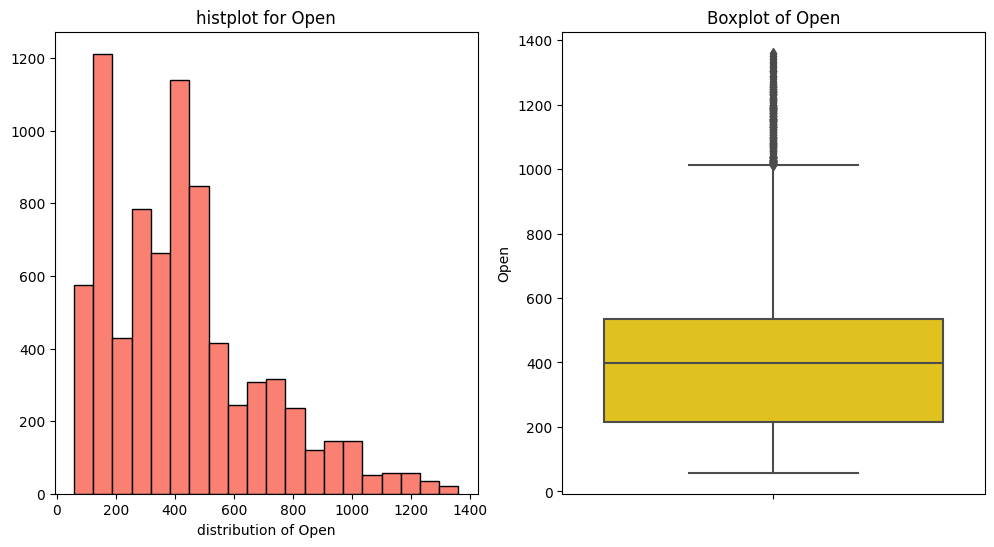

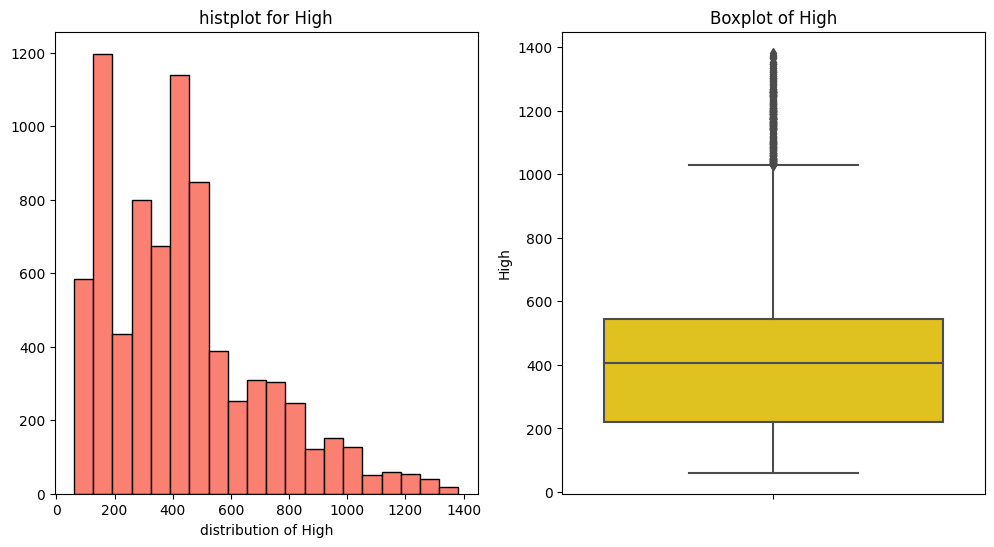

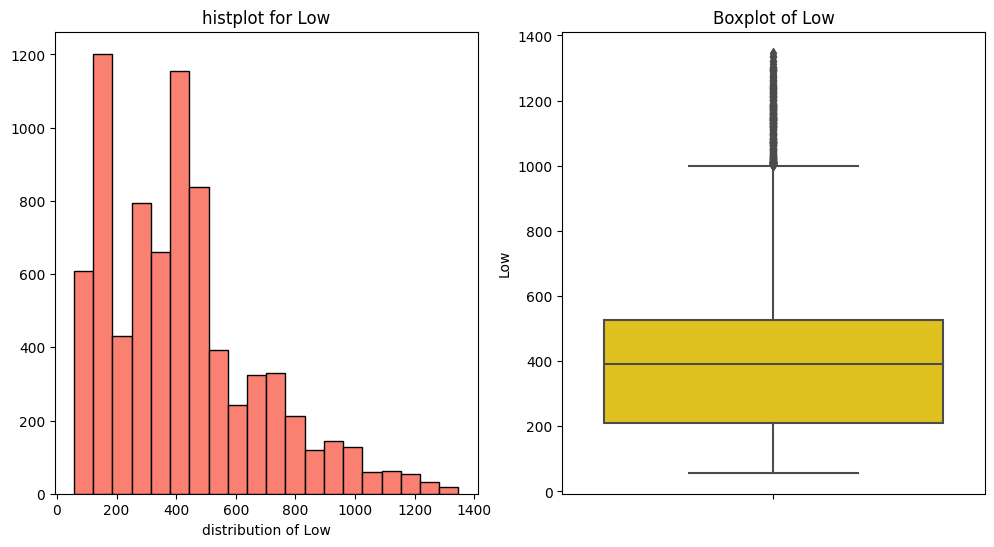

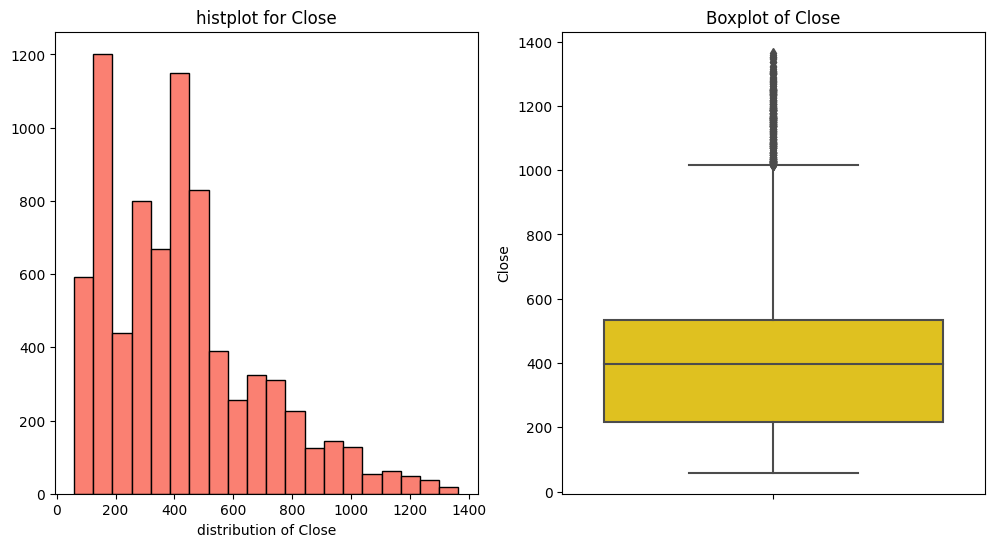

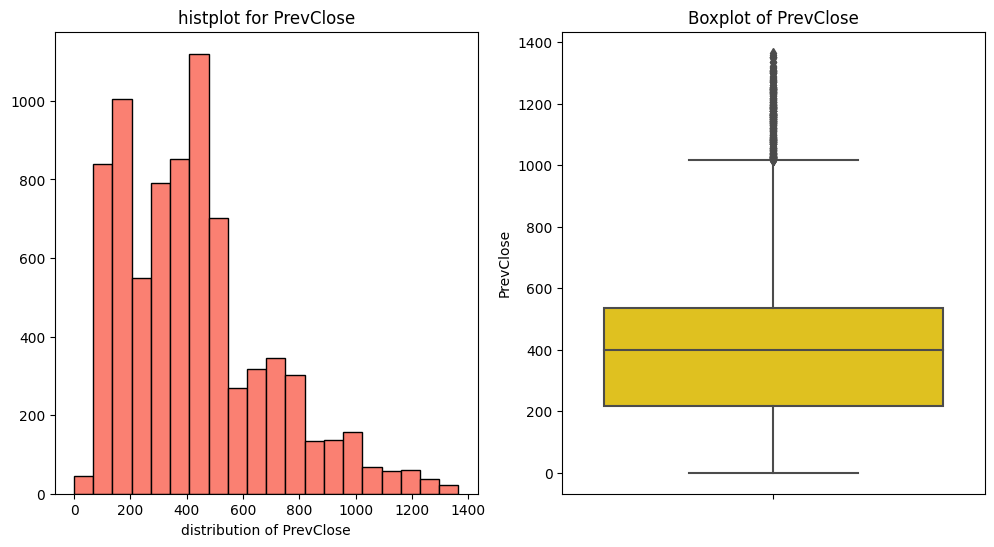

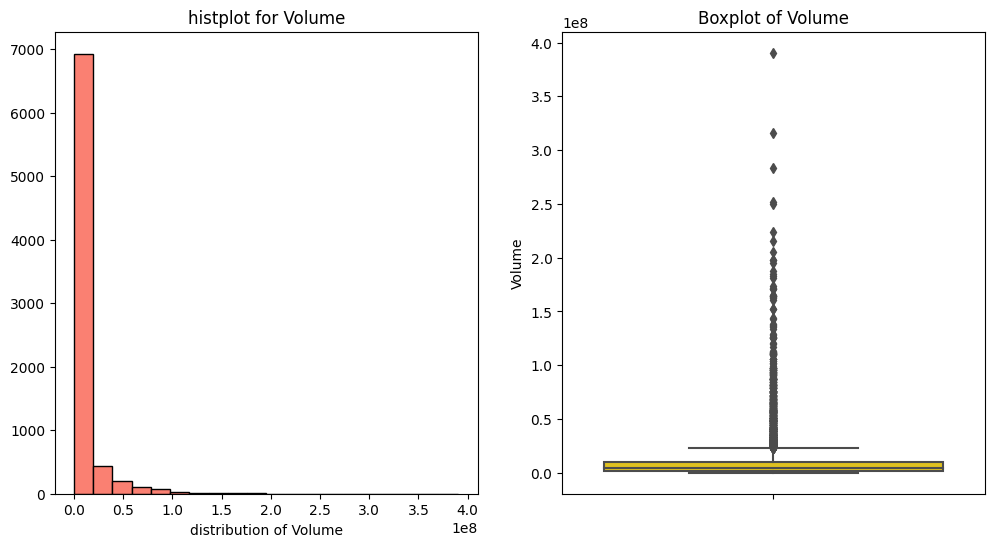

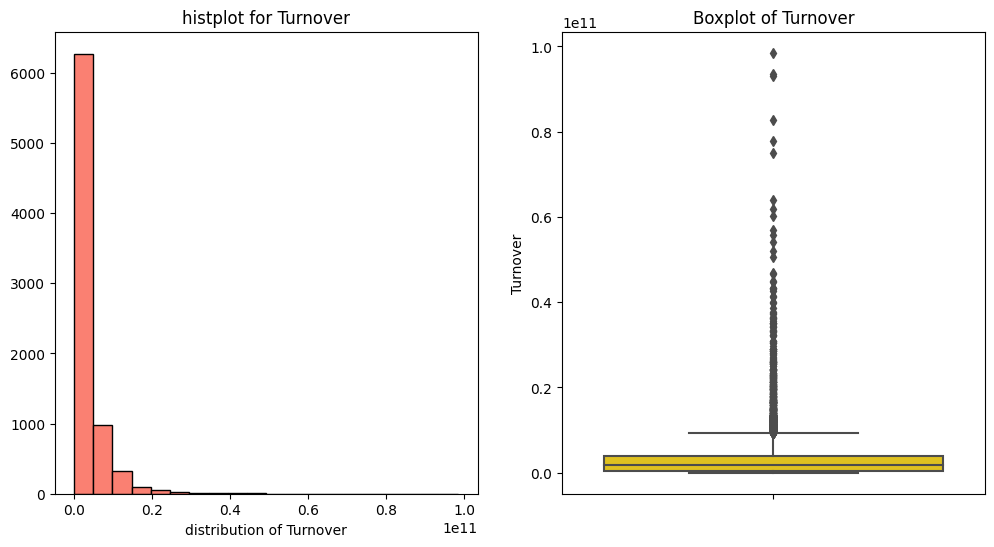

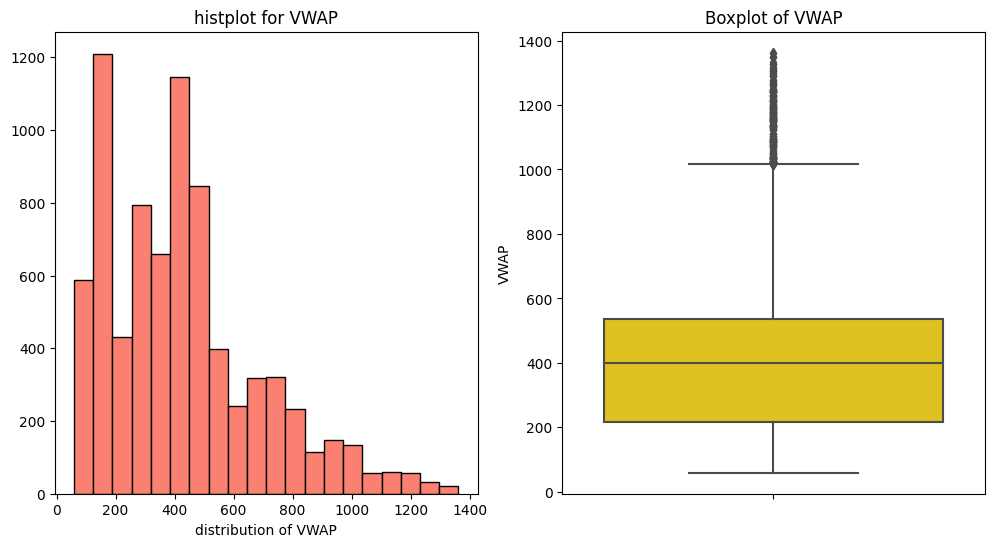

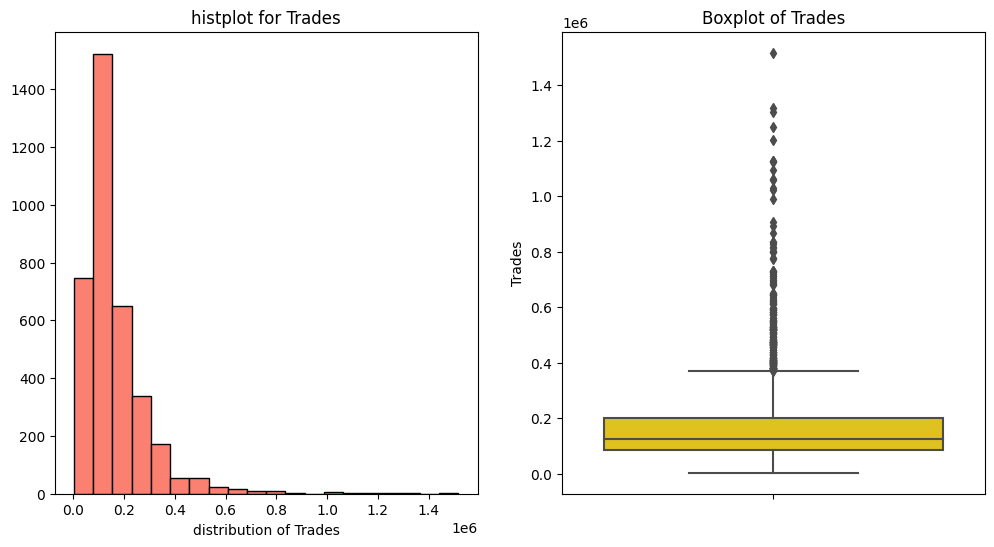

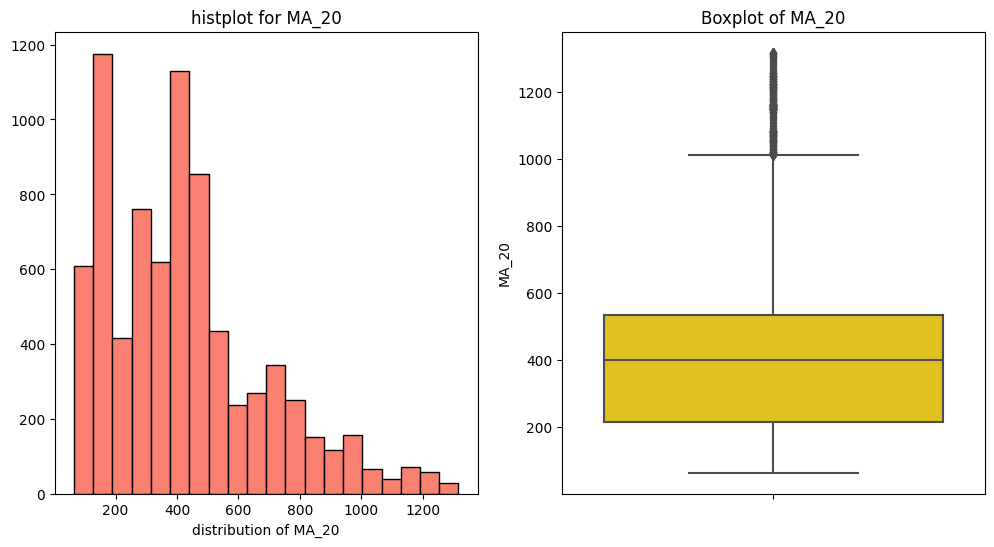

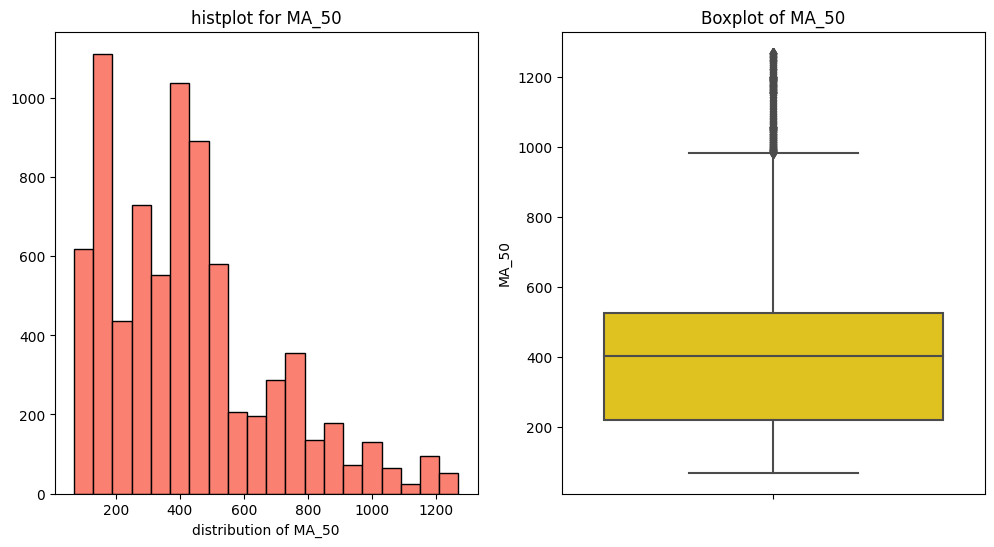

In [14]:
# lets draw the histogram and boxplot for every feature
for col in df.drop(columns =["Date","Daily_Return_%","Symbol"]):
    fig,ax = plt.subplots(1,2,figsize = (12,6))
    ax[0].hist(df[col],bins =20,color="salmon", edgecolor="black")
    ax[0].set_xlabel(f"distribution of {col}")
    ax[0].set_title(f"histplot for {col}")

    # boxplot 
    sns.boxplot(y=df[col], ax=ax[1],data = df,color = "gold")
    ax[1].set_title(f"Boxplot of {col}")
    plt.show()



## observation 

* WE CAN CLEARLY OBSERVE THAT DATA IS NOT NORMALYY DISTRIBUTION
* HERE MANY OUTLIERS ARE PRESENT IN EVERY FEATURE DUE TO UNNORMALL BEHAVIOUR OF DATA


In [15]:
#  FOR VISULIZATION OF DATA IN DATE TIME LINE LETS REINDEEX DATA WITH DATE
dfnew = df.copy()
dfnew.set_index("Date",inplace = True)

dfnew

,Symbol,Open,High,Low,Close,PrevClose,Volume,Turnover,VWAP,Trades,Daily_Return_%,MA_20,MA_50
Date,,,,,,,,,,,,,
1995-01-02,TATAMOTORS,517.50,524.70,517.50,524.20,522.00,1100,5.735300e+05,521.39,NaN,0.421456,NaN,NaN
1995-01-03,TATAMOTORS,518.00,520.00,515.00,515.00,524.20,1500,7.754500e+05,516.97,NaN,-1.755055,NaN,NaN
1995-01-04,TATAMOTORS,515.00,515.00,515.00,515.00,515.00,300,1.545000e+05,515.00,NaN,0.000000,NaN,NaN
1995-01-05,TATAMOTORS,480.00,480.00,480.00,480.00,515.00,50,2.400000e+04,480.00,NaN,-6.796117,NaN,NaN
1995-01-06,TATAMOTORS,495.00,501.00,495.00,498.70,480.00,200,9.955000e+04,497.75,NaN,3.895833,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-12,TATAMOTORS,651.10,660.95,650.80,654.10,653.75,11212223,7.348231e+09,655.38,223425.0,0.053537,669.3700,683.496
2025-08-13,TATAMOTORS,657.20,667.00,656.65,663.75,654.10,7557556,5.016113e+09,663.72,133862.0,1.475310,668.6075,682.568
2025-08-14,TATAMOTORS,666.00,666.55,657.70,664.60,663.75,6250494,4.140530e+09,662.43,115002.0,0.128060,667.7525,681.640


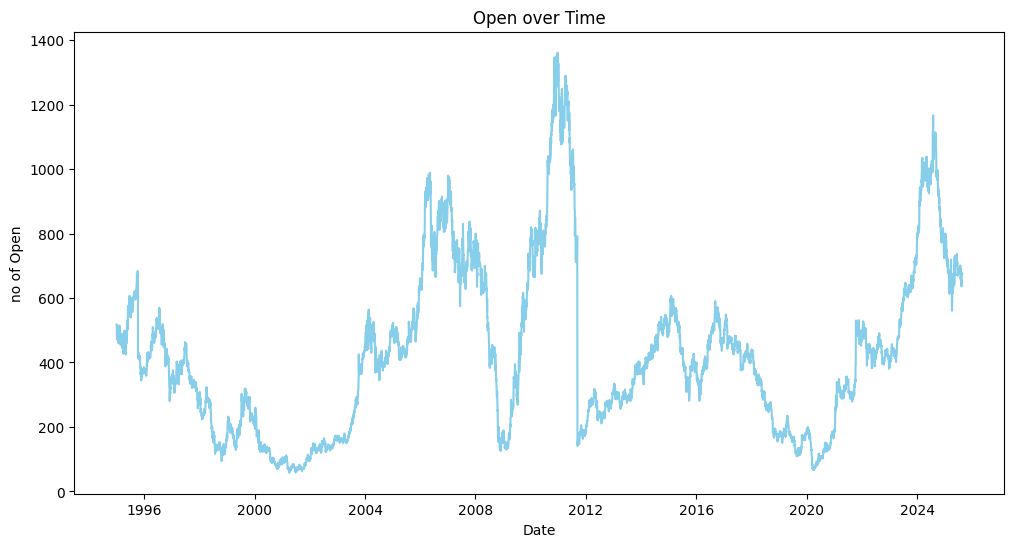

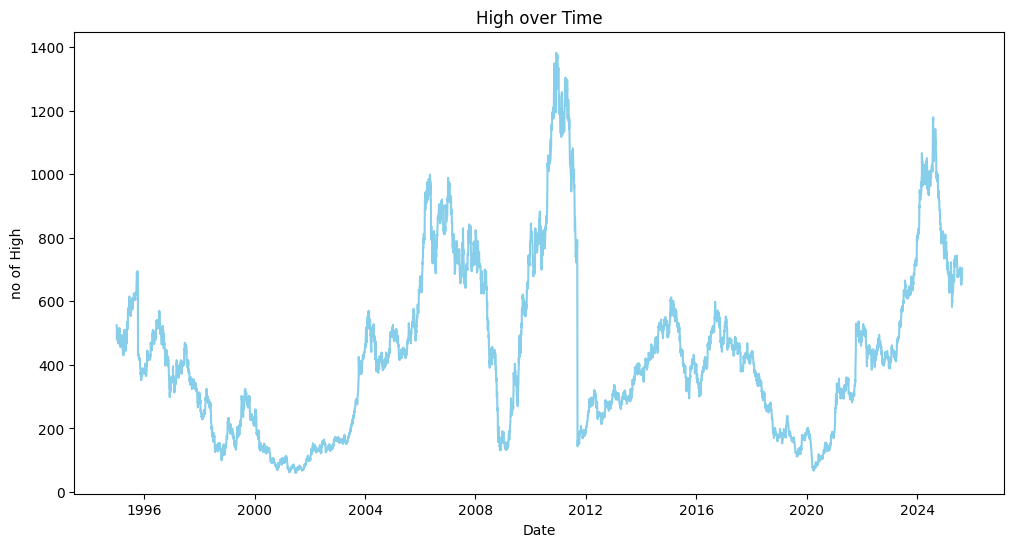

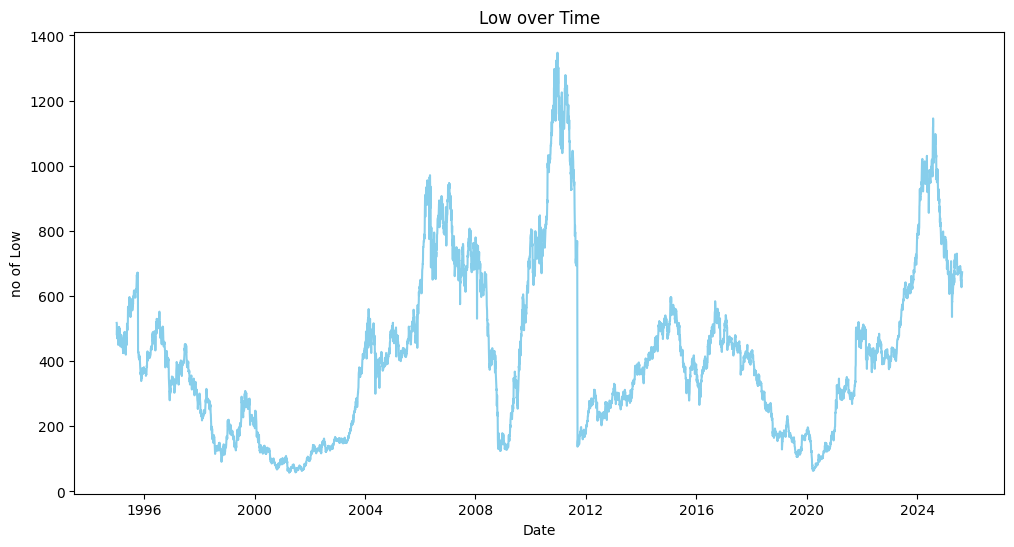

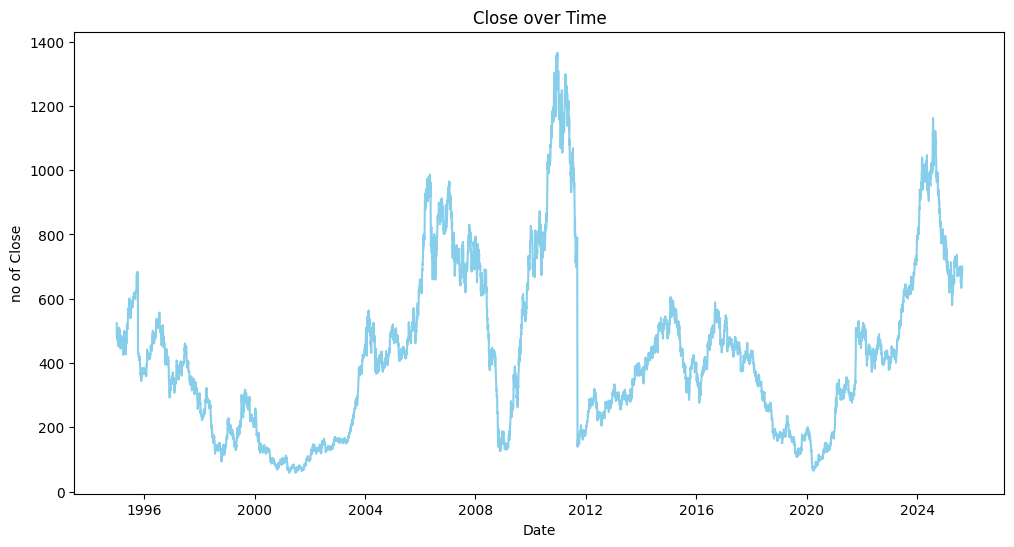

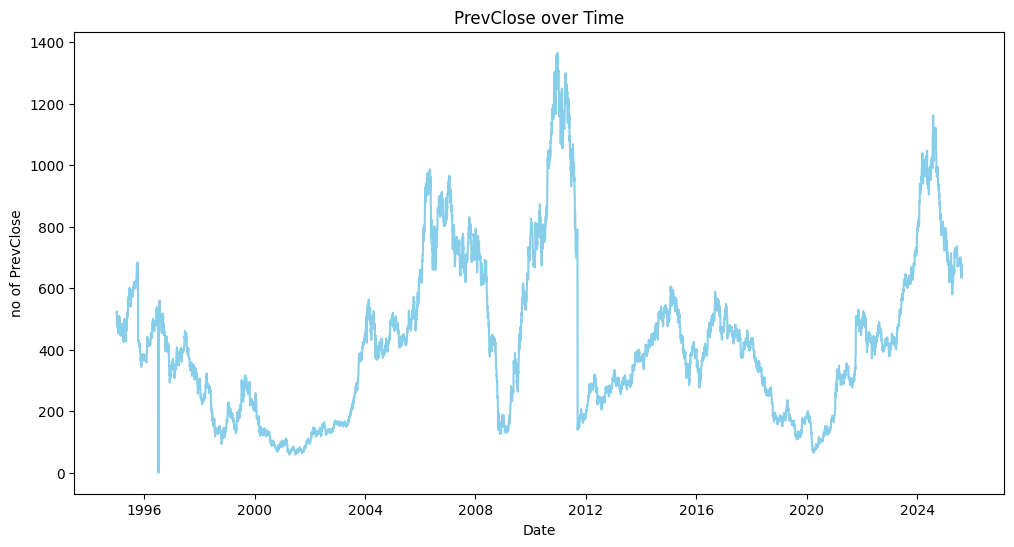

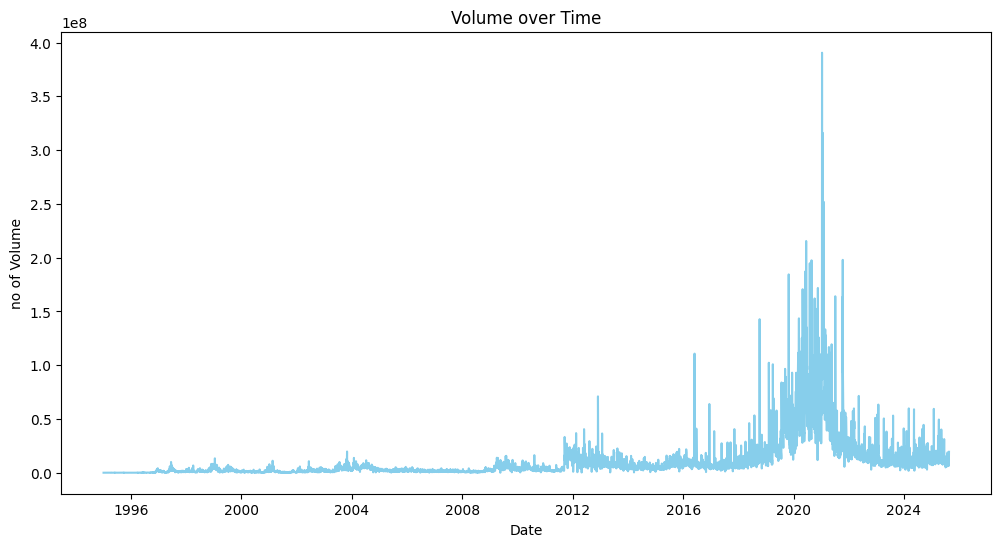

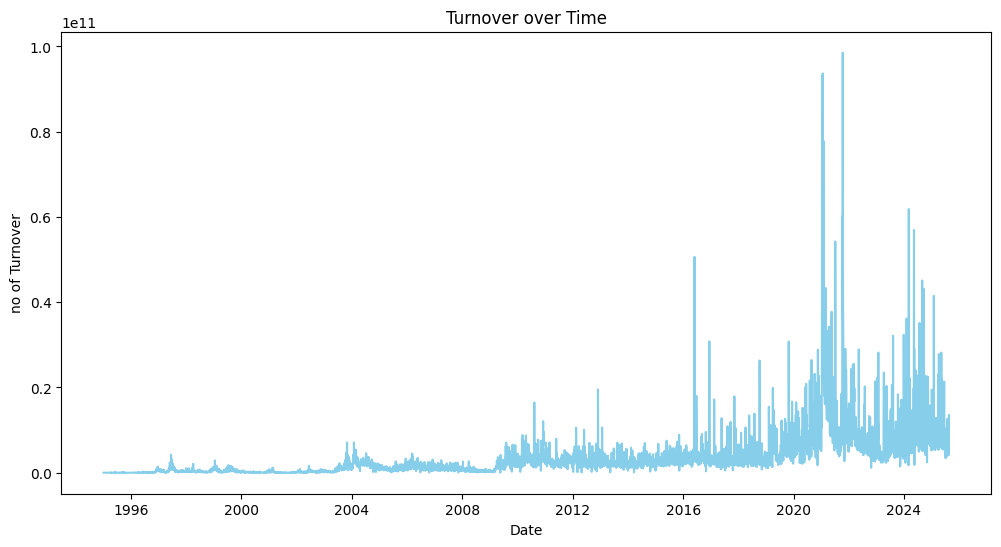

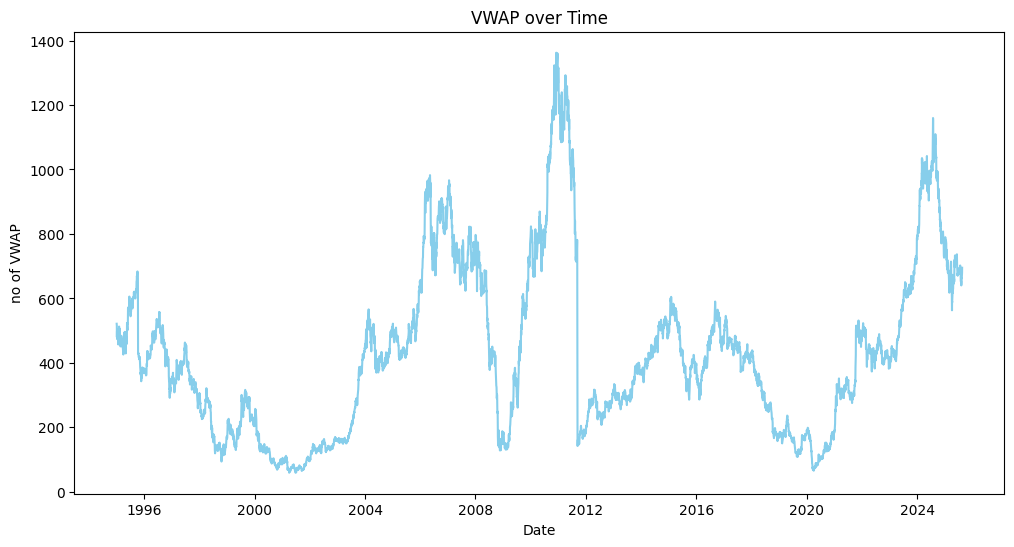

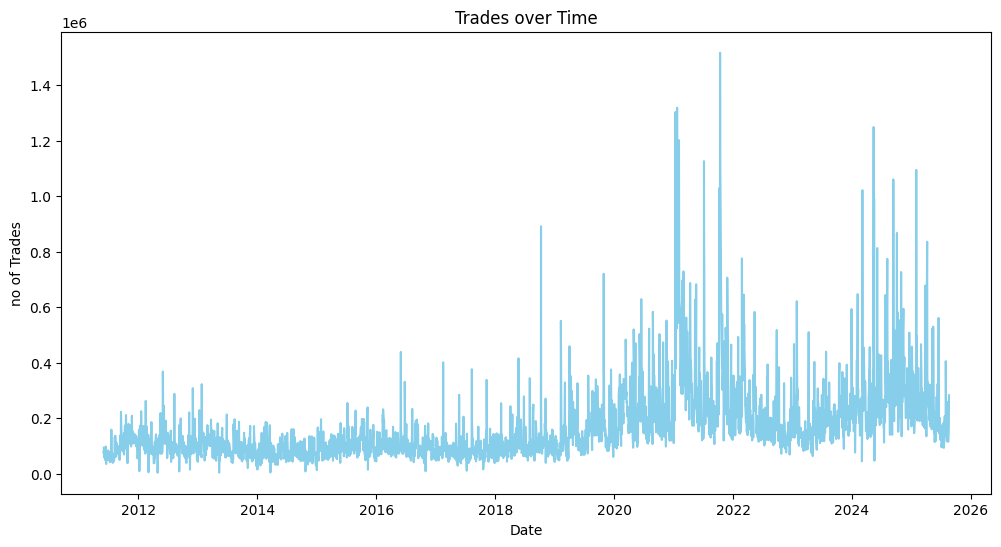

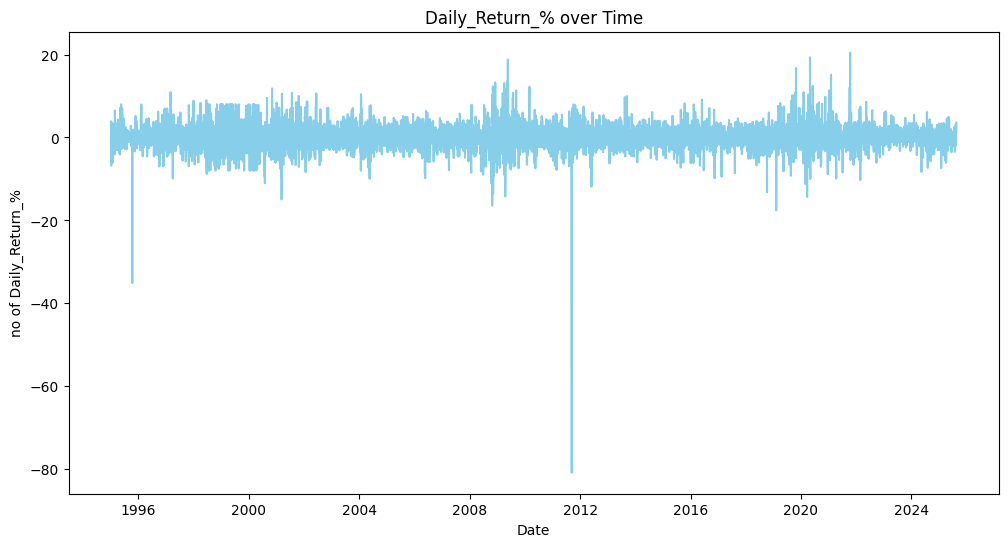

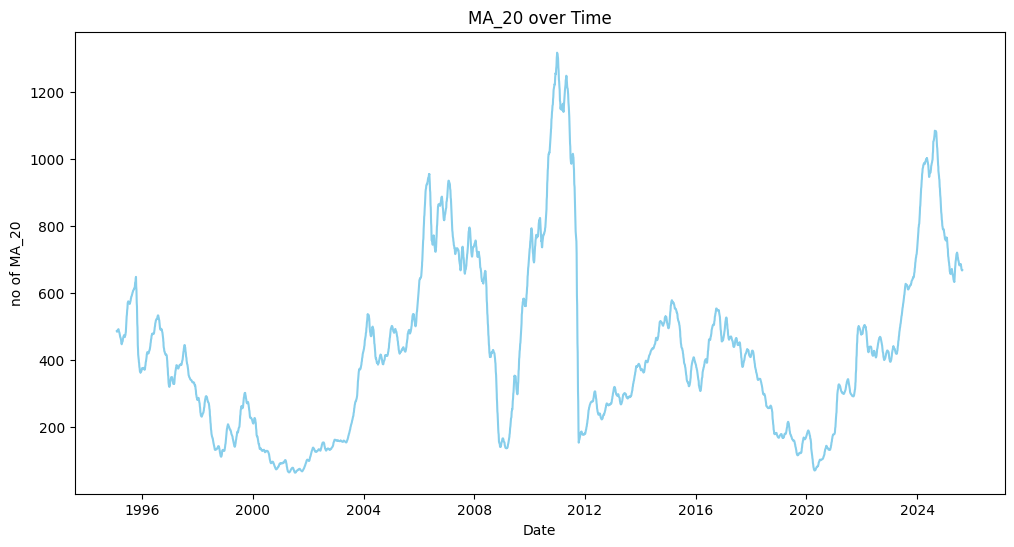

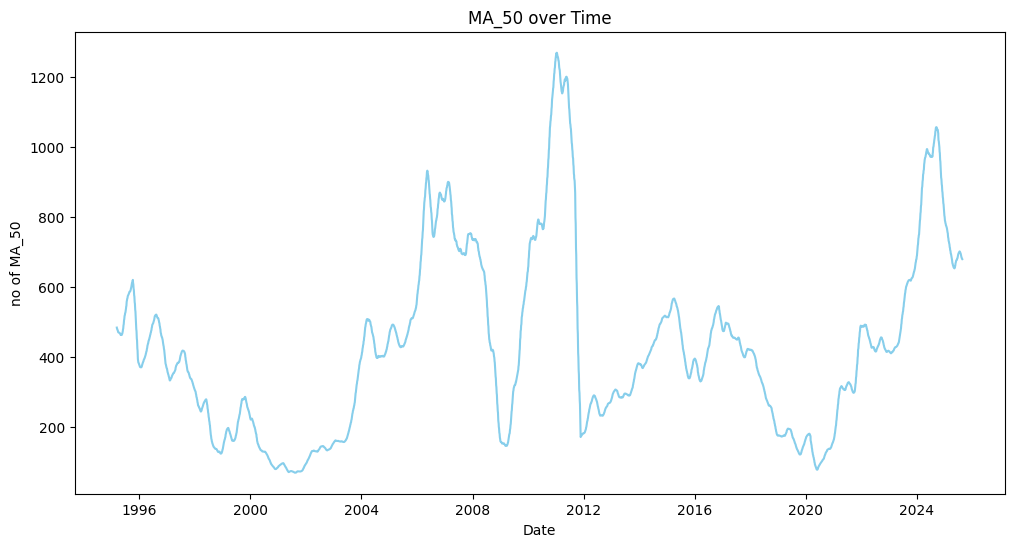

In [16]:
#  plot per year
for i in dfnew.drop(columns = "Symbol"):
    plt.figure(figsize=(12,6))
    plt.plot(dfnew.index, dfnew[i], color="skyblue")
    plt.title(f"{i} over Time")
    plt.xlabel("Date")
    plt.ylabel(f"no of {i}")
    plt.show()

In [17]:
# here we can easily observe the values per year


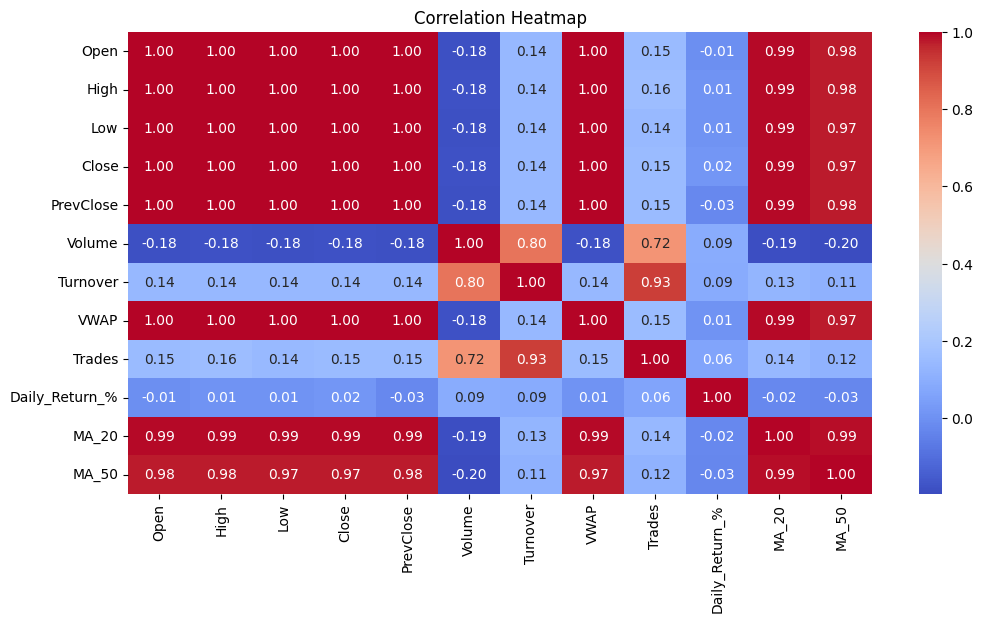

In [18]:
# corelation between every numerical columns
plt.figure(figsize = (12,6))
cor = df.select_dtypes(include = (np.number)).corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show() 

## modeling

In [19]:
#  lets drop the null values
df.dropna(inplace = True)

In [20]:
df.shape

(3617, 14)

In [21]:
# LETS SCALE LITTLE BIT
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in df.drop(columns = ["Turnover","Date","Symbol"]):
    df[col] = ss.fit_transform(df[[col]])

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns = ["Turnover","Date","Symbol"]),df["Turnover"])

In [23]:
# IMPORT MODELS
from sklearn.linear_model import LinearRegression       # Ordinary Least Squares
from sklearn.linear_model import Ridge                  # L2 regularized
from sklearn.linear_model import Lasso                  # L1 regularized
from sklearn.linear_model import ElasticNet             # L1 + L2 regularization
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
lr = LinearRegression()
l1 = Ridge()
l2 = Lasso()
l = ElasticNet(alpha=0.1, max_iter=10000)
forest = RandomForestRegressor()
boost = GradientBoostingRegressor()
adboost = AdaBoostRegressor()
tre =DecisionTreeRegressor()
models = [lr,l1,l2,l,forest,boost,adboost,tre]

In [24]:
from sklearn.metrics import r2_score
result = {}
for i in models:
    # fit our model
    i.fit(xtrain,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = r2_score(ytest,i.predict(xtest))
    print(f"r2 score for {i }",r2)

    result[i] = r2*100
    print("\n====================\n")

LinearRegression() succesfully trained
r2 score for LinearRegression() 0.9202025109983839


Ridge() succesfully trained
r2 score for Ridge() 0.9190091556879146


Lasso() succesfully trained
r2 score for Lasso() 0.9190616873248074


ElasticNet(alpha=0.1, max_iter=10000) succesfully trained
r2 score for ElasticNet(alpha=0.1, max_iter=10000) 0.9102702207958598




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.631e+21, tolerance: 1.110e+19
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor() succesfully trained
r2 score for RandomForestRegressor() 0.9538433588343692


GradientBoostingRegressor() succesfully trained
r2 score for GradientBoostingRegressor() 0.9745209023610912


AdaBoostRegressor() succesfully trained
r2 score for AdaBoostRegressor() 0.8558072423808178


DecisionTreeRegressor() succesfully trained
r2 score for DecisionTreeRegressor() 0.9111676973467003




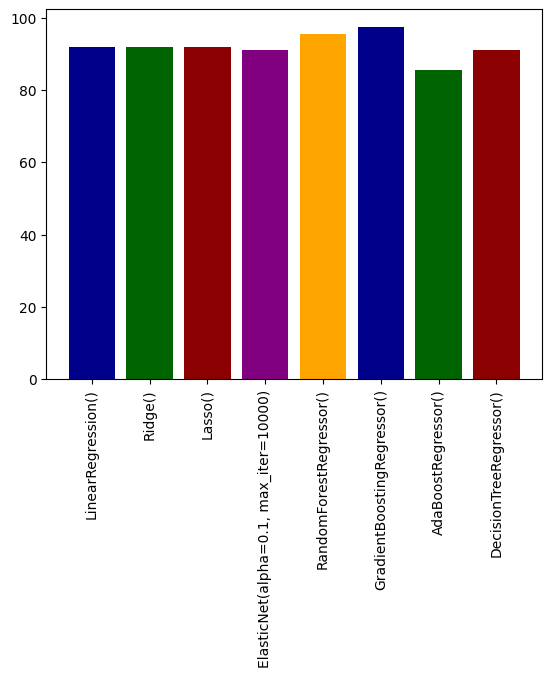

In [25]:
 # plot for differnt model
plt.bar([str(k) for k in result.keys()],result.values(), color=["darkblue","darkgreen","darkred","purple","orange"])
plt.xticks(rotation = 90)
plt.show()

> THANKS FOR READING
> PLEASE UPVOTE IF YOU LIKES